In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

In [2]:
f = open("images/sino3.txt", 'r')
line = f.read()
print(line)
f.close

   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	  -0.0000000e+00	  -0.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+

<function TextIOWrapper.close()>

In [3]:
import numpy as np
metal3_img = np.zeros((256,360))
k = 0
l = 0
for i, j in enumerate(line):
    if j == '\t':
        metal3_img[k,l] = float(line[i-14:i])
        k = k+1
        if k == 256:
            k = 0
            l = l+1

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

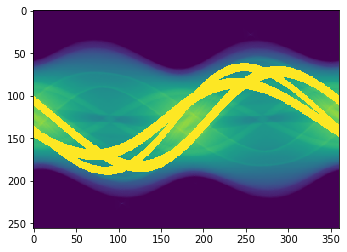

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

plt.imshow(metal3_img)
plt.colorbar

In [5]:
metal3_img.shape

(256, 360)

In [6]:
result_img = metal3_img
window_size = 3

k = 0
z = 0

for i in range(256-window_size):
    for j in range(90-window_size):
        if 0 in result_img[i:i+window_size,j:j+window_size]:
            z=0
        else:
            if 300 in result_img[i:i+window_size,j:j+window_size]:
                z = 0
            else:
                if result_img[i+window_size,j] == 300:
                    z = 0
                else:
                    if result_img[i+window_size,j] == 0:
                        z = 0
                    else:
                        k = k+1
train_data = np.zeros((k,window_size,window_size,1))
result_data = np.zeros((k,1))

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (1, 1), activation='relu', input_shape=(3, 3, 1)))
model.add(layers.MaxPooling2D((1, 1)))
model.add(layers.Conv2D(64, (1, 1), activation='relu'))
model.add(layers.MaxPooling2D((1, 1)))
model.add(layers.Conv2D(64, (1, 1), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(300, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 3, 3, 32)          64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 3, 3, 64)          2112      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          4160      
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [8]:
a = [0,1,2,3,4]
a[0:3]

[0, 1, 2]

In [9]:
k = 0

for i in range(256-window_size):
    for j in range(90-window_size):
        if 0 in result_img[i:i+window_size,j:j+window_size]:
            z=0
        else:
            if 300 in result_img[i:i+window_size,j:j+window_size]:
                z = 0
            else:
                if result_img[i+window_size,j] == 300:
                    z = 0
                else:
                    if result_img[i+window_size,j] == 0:
                        z = 0
                    else:
                        for v in range(window_size):
                            for w in range(window_size):
                                train_data[k,w,v,0] = result_img[i+w,j+v]
                        result_data[k,0] = int(result_img[i+window_size,j])
                        k = k+1
print(train_data.shape)
print(result_data.shape)

model.fit(train_data, result_data, epochs=1000)

(15176, 3, 3, 1)
(15176, 1)
Epoch 1/1000
475/475 [==============================] - 1s 1ms/step - loss: 4.0110 - accuracy: 0.3113
Epoch 2/1000
475/475 [==============================] - 1s 1ms/step - loss: 3.5288 - accuracy: 0.3188
Epoch 3/1000
475/475 [==============================] - 1s 1ms/step - loss: 3.3088 - accuracy: 0.3239
Epoch 4/1000
475/475 [==============================] - 1s 1ms/step - loss: 3.0331 - accuracy: 0.3295
Epoch 5/1000
475/475 [==============================] - 1s 1ms/step - loss: 2.8289 - accuracy: 0.3378
Epoch 6/1000
475/475 [==============================] - 1s 1ms/step - loss: 2.6628 - accuracy: 0.3426
Epoch 7/1000
475/475 [==============================] - 1s 1ms/step - loss: 2.5997 - accuracy: 0.3497
Epoch 8/1000
475/475 [==============================] - 1s 1ms/step - loss: 2.4982 - accuracy: 0.3542
Epoch 9/1000
475/475 [==============================] - 1s 1ms/step - loss: 2.4282 - accuracy: 0.3557
Epoch 10/1000
475/475 [==============================]

475/475 [==============================] - 1s 2ms/step - loss: 1.7553 - accuracy: 0.4218
Epoch 81/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.7317 - accuracy: 0.4294
Epoch 82/1000
475/475 [==============================] - 1s 1ms/step - loss: 1.7341 - accuracy: 0.4290
Epoch 83/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.7396 - accuracy: 0.4265
Epoch 84/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.7279 - accuracy: 0.4294
Epoch 85/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.7255 - accuracy: 0.4283
Epoch 86/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.7278 - accuracy: 0.4290
Epoch 87/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.7223 - accuracy: 0.4284
Epoch 88/1000
475/475 [==============================] - 1s 1ms/step - loss: 1.7255 - accuracy: 0.4352
Epoch 89/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.7149 - a

475/475 [==============================] - 1s 2ms/step - loss: 1.5579 - accuracy: 0.4629
Epoch 159/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.5784 - accuracy: 0.4583
Epoch 160/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.5551 - accuracy: 0.4581
Epoch 161/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.5531 - accuracy: 0.4636
Epoch 162/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.5558 - accuracy: 0.4631
Epoch 163/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.5623 - accuracy: 0.4626
Epoch 164/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.5453 - accuracy: 0.4653
Epoch 165/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.5451 - accuracy: 0.4599
Epoch 166/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.5495 - accuracy: 0.4610
Epoch 167/1000
475/475 [==============================] - 1s 2ms/step - loss: 1

475/475 [==============================] - 1s 2ms/step - loss: 1.4593 - accuracy: 0.4844
Epoch 237/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.4603 - accuracy: 0.4818
Epoch 238/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.4708 - accuracy: 0.4750
Epoch 239/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.4580 - accuracy: 0.4815
Epoch 240/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.4608 - accuracy: 0.4821
Epoch 241/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.4753 - accuracy: 0.4783
Epoch 242/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.4708 - accuracy: 0.4730
Epoch 243/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.4519 - accuracy: 0.4848
Epoch 244/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.4564 - accuracy: 0.4844
Epoch 245/1000
475/475 [==============================] - 1s 2ms/step - loss: 1

475/475 [==============================] - 1s 2ms/step - loss: 1.4063 - accuracy: 0.4970
Epoch 315/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.4011 - accuracy: 0.5002
Epoch 316/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.4290 - accuracy: 0.4888
Epoch 317/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.3973 - accuracy: 0.4947
Epoch 318/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.4034 - accuracy: 0.4935
Epoch 319/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.3998 - accuracy: 0.4999
Epoch 320/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.4096 - accuracy: 0.4912
Epoch 321/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.4269 - accuracy: 0.4903
Epoch 322/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.4128 - accuracy: 0.4962
Epoch 323/1000
475/475 [==============================] - 1s 2ms/step - loss: 1

475/475 [==============================] - 1s 2ms/step - loss: 1.3554 - accuracy: 0.5102
Epoch 393/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.3570 - accuracy: 0.5032
Epoch 394/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.3752 - accuracy: 0.5053
Epoch 395/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.3442 - accuracy: 0.5152
Epoch 396/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.3638 - accuracy: 0.5084
Epoch 397/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.3599 - accuracy: 0.5065
Epoch 398/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.3643 - accuracy: 0.5069
Epoch 399/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.3626 - accuracy: 0.5032
Epoch 400/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.3454 - accuracy: 0.5125
Epoch 401/1000
475/475 [==============================] - ETA: 0s - loss: 1.372

475/475 [==============================] - 1s 2ms/step - loss: 1.3161 - accuracy: 0.5183
Epoch 471/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.3323 - accuracy: 0.5132
Epoch 472/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.3474 - accuracy: 0.5099
Epoch 473/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.3150 - accuracy: 0.5208
Epoch 474/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.3469 - accuracy: 0.5088
Epoch 475/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.3230 - accuracy: 0.5195
Epoch 476/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.3418 - accuracy: 0.5113
Epoch 477/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.3161 - accuracy: 0.5176
Epoch 478/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.3272 - accuracy: 0.5153
Epoch 479/1000
475/475 [==============================] - 1s 2ms/step - loss: 1

475/475 [==============================] - 1s 2ms/step - loss: 1.2882 - accuracy: 0.5237
Epoch 549/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.3088 - accuracy: 0.5257
Epoch 550/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.3051 - accuracy: 0.5264
Epoch 551/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.3654 - accuracy: 0.5168
Epoch 552/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.3059 - accuracy: 0.5230
Epoch 553/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.2851 - accuracy: 0.5250
Epoch 554/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.2958 - accuracy: 0.5219
Epoch 555/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.3035 - accuracy: 0.5186
Epoch 556/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.3021 - accuracy: 0.5206
Epoch 557/1000
475/475 [==============================] - 1s 2ms/step - loss: 1

475/475 [==============================] - 1s 2ms/step - loss: 1.2836 - accuracy: 0.5293
Epoch 627/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.2927 - accuracy: 0.5273
Epoch 628/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.2790 - accuracy: 0.5306
Epoch 629/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.2755 - accuracy: 0.5297
Epoch 630/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.2867 - accuracy: 0.5293
Epoch 631/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.2812 - accuracy: 0.5292
Epoch 632/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.2869 - accuracy: 0.5311
Epoch 633/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.2721 - accuracy: 0.5297
Epoch 634/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.2912 - accuracy: 0.5260
Epoch 635/1000
475/475 [==============================] - 1s 2ms/step - loss: 1

475/475 [==============================] - 1s 2ms/step - loss: 1.2648 - accuracy: 0.5303
Epoch 705/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.3013 - accuracy: 0.5208
Epoch 706/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.2964 - accuracy: 0.5328
Epoch 707/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.2594 - accuracy: 0.5306
Epoch 708/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.2529 - accuracy: 0.5372
Epoch 709/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.2603 - accuracy: 0.5335
Epoch 710/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.2807 - accuracy: 0.5306
Epoch 711/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.2645 - accuracy: 0.5307
Epoch 712/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.2730 - accuracy: 0.5338
Epoch 713/1000
475/475 [==============================] - 1s 2ms/step - loss: 1

475/475 [==============================] - 1s 2ms/step - loss: 1.2390 - accuracy: 0.5432
Epoch 783/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.2458 - accuracy: 0.5378
Epoch 784/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.2732 - accuracy: 0.5328
Epoch 785/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.2433 - accuracy: 0.5382
Epoch 786/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.2552 - accuracy: 0.5329
Epoch 787/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.2611 - accuracy: 0.5354
Epoch 788/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.2471 - accuracy: 0.5360
Epoch 789/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.2555 - accuracy: 0.5372
Epoch 790/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.2653 - accuracy: 0.5314
Epoch 791/1000
475/475 [==============================] - 1s 2ms/step - loss: 1

475/475 [==============================] - 1s 2ms/step - loss: 1.2333 - accuracy: 0.5441
Epoch 861/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.2311 - accuracy: 0.5463
Epoch 862/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.2532 - accuracy: 0.5395
Epoch 863/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.2558 - accuracy: 0.5393
Epoch 864/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.2520 - accuracy: 0.5368
Epoch 865/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.2439 - accuracy: 0.5380
Epoch 866/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.2229 - accuracy: 0.5491
Epoch 867/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.2369 - accuracy: 0.5389
Epoch 868/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.2343 - accuracy: 0.5428
Epoch 869/1000
475/475 [==============================] - 1s 2ms/step - loss: 1

475/475 [==============================] - 1s 2ms/step - loss: 1.2184 - accuracy: 0.5478
Epoch 939/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.2346 - accuracy: 0.5427
Epoch 940/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.2213 - accuracy: 0.5467
Epoch 941/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.2005 - accuracy: 0.5550
Epoch 942/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.2414 - accuracy: 0.5456
Epoch 943/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.2237 - accuracy: 0.5448
Epoch 944/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.2120 - accuracy: 0.5451
Epoch 945/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.2322 - accuracy: 0.5410
Epoch 946/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.2289 - accuracy: 0.5468
Epoch 947/1000
475/475 [==============================] - 1s 2ms/step - loss: 1

In [10]:
for i in range(256-window_size):
    for j in range(90-window_size):
        if 300 in result_img[i:i+window_size, j:j+window_size]:
            z = 0
        else:
            if result_img[i+window_size,j] == 300:
                test_data = np.zeros((1,window_size,window_size,1))
                for v in range(window_size):
                    for w in range(window_size):
                        test_data[0,w,v,0] = result_img[i+w,j+v]
                prediction = model.predict(test_data)
                result_img[i+window_size,j] = np.where(prediction[0]==max(prediction[0]))[0][0]

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

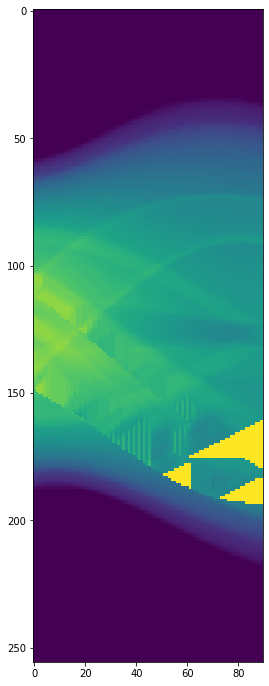

In [11]:
plt.figure(figsize=(8,12))
plt.imshow(result_img[:,0:90])
plt.colorbar

In [12]:
# plt.imshow(result_img)
# plt.colorbar
# plt.axis('off'), plt.xticks([]), plt.yticks([])
# plt.tight_layout()
# plt.subplots_adjust(left = 0, bottom = 0, right = 1, top = 1, hspace = 0, wspace = 0)
# plt.savefig('images/RCNN3(100)_test.png', bbox_inches = 'tight', pad_inches=0, dpi=100)

In [13]:
# np.savetxt('images/CNN_Metal3_3by3_txt.txt', result_img)